## Лабораторная работа №1 | Вариант 6

Выполнил: 

### 1. Numpy

In [1]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [2]:
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

2. Создайте матрицу 5х5 со значениями 1, 2, 3, 4 ниже диагонали

Не очень понятна формулировка задания


In [3]:
np.diag([1, 2, 3, 4], k=-1)

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0]])

3. Какой выход будет у данного скрипта

```python
# Author: Jake VanderPlas

print(sum(range(5),-1))
from numpy import *
print(sum(range(5),-1))
```

Выводом будет:
```
9
10
```

In [4]:
# Используется встроенная функция sum(iterable, start). -1 является start и прибавляется к сумме элементов
print(sum(range(5),-1))
# Используется numpy.sum
# numpy.sum(a, axis=None, dtype=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>). -1 считается за аргумент axis
print(np.sum(range(5),-1))

9
10


In [5]:
import inspect


# Проверка сигнатуры встроенной функции sum
print(inspect.signature(sum))

# Проверка сигнатуры функции sum из NumPy
print(inspect.signature(np.sum))

(iterable, /, start=0)
(a, axis=None, dtype=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)


4. Как найти самое часто встречаемое значение между двумя массивами? 

In [6]:
array1 = np.array([1, 2, 3, 4, 5, 5, 2])
array2 = np.array([2, 3, 4, 4, 4, 5])

combined_array = np.concatenate((array1, array2))
np.bincount(combined_array).argmax()

4

5. Как игнорировать все warnings в numpy(не нужно так делать, но покажи)?

In [7]:
import warnings


warnings.filterwarnings("ignore")

In [8]:
array = np.array([1, 2, 3, 0])
np.log(array)  # логарифм от 0 вызовет warning

array([0.        , 0.69314718, 1.09861229,       -inf])

6. Реализуем функцию-генератор, которая генерирует 10 целых чисел и используем ее для построения массива

In [9]:
def generate10nums():
    for _ in range(10):
        yield np.random.randint(1, 100)

np.fromiter(generate10nums(), dtype=int)

array([14, 20, 37, 18, 86, 15, 87,  9, 67, 42])

7. Создайте массив случайных чисел размером 10 и отсортируйте его

In [10]:
array = np.fromiter(generate10nums(), dtype=int)
print(array)
array.sort()
print(array)

[14 96 67  4 91 63 37 12 87 72]
[ 4 12 14 37 63 67 72 87 91 96]


8. Создайте случайную матрицу 10х2 которая представляет собой декартовые координаты и преобразуйте их в полярные

In [11]:
cartesian_coords = np.random.rand(10,2)
cartesian_coords

array([[0.15308748, 0.77721944],
       [0.26579372, 0.94271233],
       [0.36100719, 0.62558981],
       [0.34161736, 0.18026228],
       [0.2830108 , 0.88510962],
       [0.95535529, 0.74071562],
       [0.52287086, 0.79853043],
       [0.36383726, 0.32067754],
       [0.58036208, 0.70618526],
       [0.65401189, 0.82414564]])

In [12]:
r = np.sqrt(cartesian_coords[:, 0]**2 + cartesian_coords[:, 1]**2)
theta = np.arctan2(cartesian_coords[:, 1], cartesian_coords[:, 0])

polar_coords = np.column_stack((r, theta))
polar_coords

array([[0.79215266, 1.37631769],
       [0.97946559, 1.29598426],
       [0.72228027, 1.04741008],
       [0.38626016, 0.48554019],
       [0.92925463, 1.26132326],
       [1.20886863, 0.65951621],
       [0.95448666, 0.99106018],
       [0.48498623, 0.72242996],
       [0.91406661, 0.88288724],
       [1.05211577, 0.89999242]])

Сделаем тест путем обратного преобразования и сравнения

In [13]:
x = polar_coords[:, 0] * np.cos(polar_coords[:, 1])
y = polar_coords[:, 0] * np.sin(polar_coords[:, 1])

cartesian_coords_converted = np.column_stack((x, y))
cartesian_coords_converted

array([[0.15308748, 0.77721944],
       [0.26579372, 0.94271233],
       [0.36100719, 0.62558981],
       [0.34161736, 0.18026228],
       [0.2830108 , 0.88510962],
       [0.95535529, 0.74071562],
       [0.52287086, 0.79853043],
       [0.36383726, 0.32067754],
       [0.58036208, 0.70618526],
       [0.65401189, 0.82414564]])

In [14]:
np.isclose(cartesian_coords, cartesian_coords_converted, atol=1e-6)

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

9. Создайте структурированный массив который будет описывать пиксель(координату x, y и цвет r,g,b)

In [15]:
pixel_dtype = np.dtype([('x', np.int64), ('y', np.int64),
                        ('r', np.uint8), ('g', np.uint8), ('b', np.uint8)])

pixels = np.array([(0, 0, 255, 0, 0),   # Красный пиксель
                   (1, 1, 0, 255, 0),   # Зеленый пиксель
                   (2, 2, 0, 0, 255)],  # Синий пиксель
                  dtype=pixel_dtype)

pixels

array([(0, 0, 255,   0,   0), (1, 1,   0, 255,   0),
       (2, 2,   0,   0, 255)],
      dtype=[('x', '<i8'), ('y', '<i8'), ('r', 'u1'), ('g', 'u1'), ('b', 'u1')])

10. Как конвертировать тип массив от float32 в int32 in place?

In [16]:
arr = np.array([1.5, 2.9, 3.1], dtype=np.float32)
arr

array([1.5, 2.9, 3.1], dtype=float32)

In [17]:
arr = arr.astype(np.int32, copy=False)
arr

array([1, 2, 3], dtype=int32)

### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Набор данных описывает эффективность учеников в зависимости от некоторых факторов влияющих на обучение и окружение человека.

Файл: `student_perfomance.csv`

```
Hours_Studied - количество часов затраченное на обучение в неделю
Attendance - поцент посещенных занятий
Parental_Involvement - уровень участия родителей в обучении учащегося
Access_to_Resources - доступность ресурсов для обучения
Extracurricular_Activities - участие во внеклассных мероприятиях
Sleep_Hours - количество часов выделяемое на сон в день
Previous_Scores - оценка за первый экзамен
Motivation_Level - уровень мотивации
Internet_Access - доступ к интернету
Tutoring_Sessions - количество посещаемых репетиторских занятий в месяц.
Family_Income - доход семьи
Teacher_Quality - насколько качественно преподает учитель
School_Type - тип школы(частная, обычная)
Peer_Influence - влияние сверстников
Physical_Activity - физическая активность
Learning_Disabilities - наличие проблем с обучаемостью
Parental_Education_Level - уровень образования родителей
Distance_from_Home - дистанция от дома до школы
Gender - пол
Exam_Score - оценка на конечном экзамене
```

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('student_perfomance.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


1. Посчитайте среднее кол-во часов уделяемое на сон студентами

Если среднее арифметическое

In [20]:
df.Sleep_Hours.mean()

7.029060087785682

2. Сколько процентов студентов посещают внеклассовые активности?

In [21]:
extra = df.Extracurricular_Activities == 'Yes'
100 * sum(extra) / len(extra)

59.60345088542455

3. Правда ли, что в среднем девушки сдают экзамены лучше, чем мужчины

Проанализируем колонку Gender на кол-во уникальных значений(хи-хи)

In [22]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [23]:
female = df[df.Gender == 'Female']
male = df[df.Gender == 'Male']

female.Exam_Score.mean() > male.Exam_Score.mean()

True

Однако по прошлым результатам все не так однозначно


In [24]:
female.Previous_Scores.mean() > male.Previous_Scores.mean()

False

In [25]:
(female.Exam_Score + female.Previous_Scores).mean() > (male.Exam_Score + male.Previous_Scores).mean()

False

4. Выведите 25 и 75 перцентили времени сна студентов

In [26]:
df.Sleep_Hours.quantile(0.25), df.Sleep_Hours.quantile(0.75)

(6.0, 8.0)

5. Правда ли, что те, кто спит больше(75 перцентиль и выше) сдает экзамен лучше, чем студенты с недосыпом(25 перцентиль и меньше)

In [27]:
overslept = df[df.Sleep_Hours >= df.Sleep_Hours.quantile(0.25)]
lackslept = df[df.Sleep_Hours <= df.Sleep_Hours.quantile(0.75)]
overslept.Exam_Score.mean() > lackslept.Exam_Score.mean()

False

6. Влияет ли физическая активность на результаты экзамена?

In [28]:
df.Physical_Activity.corr(df.Exam_Score)

0.027824436180257445

Физическая активность практически не влияет на результаты экзаменов в данном наборе данных

7. Правда ли, что слуденты, чьи родители имеют высшее образование, сдают экзамены лучше, чем остальные?

In [29]:
df.Parental_Education_Level.unique()

array(['High School', 'College', 'Postgraduate', nan], dtype=object)

Если считать College и Postgraduate высшим образованием

In [30]:
df[df.Parental_Education_Level != 'High School'].Exam_Score.mean() > df[df.Parental_Education_Level == 'High School'].Exam_Score.mean()

True

8. Как влияет участие родителей на результаты экзаменов

In [31]:
df.Parental_Involvement.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [32]:
(pd.Series(pd.factorize(df.Parental_Involvement)[0] + 1)).corr(df.Exam_Score)

0.1571141921979199

Это означает слабую положительную связь

9. Правда ли, что в семьях с доходом больше среднего дети сдают экзамены лучше?

In [33]:
df.Family_Income.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [34]:
df[df.Family_Income == 'High'].Exam_Score.mean() > df[df.Family_Income != 'High'].Exam_Score.mean()

True

10. Посчитайте долю студентов сдавших экзамен на более чем 70 баллов в семьях с доходом ниже 25го перцентиля и отсутствием доступа к интернету

In [35]:
pd.factorize(df.Parental_Involvement)[1]

Index(['Low', 'Medium', 'High'], dtype='object')

In [36]:
df['Family_Income_Encoded'] =  pd.Series(pd.factorize(df.Family_Income)[0] + 1)
df.Internet_Access.unique()

array(['Yes', 'No'], dtype=object)

Если строго ниже

In [37]:
low_families = df[(df.Family_Income_Encoded < df.Family_Income_Encoded.quantile(0.25)) & (df.Internet_Access == 'No')] 

100 * sum(low_families.Exam_Score > 70) / len(low_families) if len(low_families) > 0 else 0

0

Если не строго ниже 25го персентиля

In [38]:
low_families = df[(df.Family_Income_Encoded <= df.Family_Income_Encoded.quantile(0.25)) & (df.Internet_Access == 'No')] 

100 * sum(low_families.Exam_Score > 70) / len(low_families) if len(low_families) > 0 else 0

8.056872037914692

### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Правда ли, что количество часов затрачиваемых на сон распределено примерно нормально?

<Axes: >

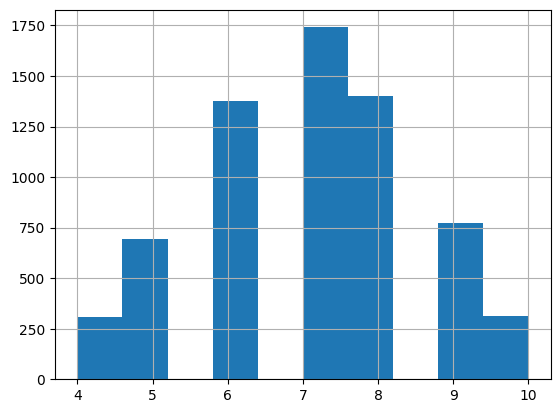

In [39]:
df.Sleep_Hours.hist()

2. Постройте гистограмму распределения количества часов затрачиваемых на обучение среди мальчиков и девочек

3. Как зависит результат конечного экзамена от результата первого экзамена

4. Постройте box plot отображающий распределение доходов семей детей сдавших экзамены на оценку ниже и выше 50 баллов

5. Правда ли, что количество посещаемых занятий с репетитором в месяц напрямую влияет на балл в конечном экзамене?

6. Как физическая активность влияет на успеваемость?

7. Постройте HeatMap где ось Х - процент посещаемость, Y - количество занятий с репетитором, а Z - балл за итоговый экзамен*

\* Задание на доп. балл